In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
!wget https://www.dropbox.com/sh/bp1dw1ptd9wpviy/AAAzRLatIJnsoBo61_gp0uVGa?dl=0

--2021-12-20 12:38:18--  https://www.dropbox.com/sh/bp1dw1ptd9wpviy/AAAzRLatIJnsoBo61_gp0uVGa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/bp1dw1ptd9wpviy/AAAzRLatIJnsoBo61_gp0uVGa [following]
--2021-12-20 12:38:18--  https://www.dropbox.com/sh/raw/bp1dw1ptd9wpviy/AAAzRLatIJnsoBo61_gp0uVGa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucded7100974cb10bae5bc93b0cc.dl.dropboxusercontent.com/zip_download_get/A_l8tQ99I49n8xD7TaIkHDDOBrgUB4HNvnc0ZRRwq6qa2qAf3WrQDSN53NCBKeMYL_1svJyJeHTYHeCscfJEvjyJ3Isx8wekk-trLDFxmbrP9A# [following]
--2021-12-20 12:38:22--  https://ucded7100974cb10bae5bc93b0cc.dl.dropboxusercontent.com/zip_download_get/A_l8tQ99I49n8xD7TaIkHDDOBrgUB4HNvnc0ZRRwq6qa2qAf3WrQDSN53NCBKeMYL_1svJyJeHTYHeCs

In [ ]:
!unzip /content/AAAzRLatIJnsoBo61_gp0uVGa?dl=0

Streaming output truncated to the last 5000 lines.
 extracting: Brain Tumor/Caner--1839-_jpg.rf.af89a9ef8d80c381b5f91e930fce3c79.jpg  
 extracting: Brain Tumor/Caner--3868-_jpg.rf.4571f829106407695e51f6799e0a206e.jpg  
 extracting: Brain Tumor/Caner--2798-_jpg.rf.559adaac787be4e580fba296aa4188ff.jpg  
 extracting: Brain Tumor/Caner--3096-_jpg.rf.6219cebebc91a19c303d09a9c36d165e.jpg  
 extracting: Healthy/Not-Caner--2441-_jpg.rf.8989beb804de00e35339b012c1ccc9ae.jpg  
 extracting: Healthy/Not-Caner--2292-_jpg.rf.0405577aa4c6c9adcf7e17343f523244.jpg  
 extracting: Healthy/Not-Caner--1939-_jpg.rf.91f7053c00cdbdec3eadcf56245a1f39.jpg  
 extracting: Brain Tumor/Caner--1967-_jpg.rf.6489ec9d891ee956bec657dc45259f4e.jpg  
 extracting: Healthy/Not-Caner--1157-_jpg.rf.0ce0ec82895aafce17dd9433bf1250ec.jpg  
 extracting: Brain Tumor/Caner--2880-_jpg.rf.7285a8e2b55b1a501cc428a4b2e59aba.jpg  
 extracting: Brain Tumor/Caner--3997-_jpg.rf.88902163111d95947330829a2d58b4a2.jpg  
 extracting: Brain Tumor/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob 
import tensorflow as tf

In [ ]:
#count the number of images in the respective classes 
root_dir = "/content/sample_data/BTAD"
no_of_images={}
for dir in os.listdir(root_dir):
  no_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))
print(no_of_images.items())

dict_items([('Healthy', 2575), ('Brain Tumor', 5620)])


In [ ]:
#Create folder for train test and valid a

def create_folder(folder_name,percentage):
  if not os.path.exists("./"+folder_name+"/"):
    os.mkdir("./"+folder_name+"/")
    for dir in os.listdir(root_dir):
      os.makedirs("./"+folder_name+"/"+dir)
      for image in np.random.choice(a = os.listdir(os.path.join(root_dir,dir)),
                                    size= (math.floor(percentage/100*no_of_images[dir])-2)
                                    ,replace=False):
        source = os.path.join(root_dir,dir,image)
        dest = os.path.join("./"+folder_name,dir)
        shutil.copy(source,dest)
        os.remove(source)

  else:
    print("Folder is already exist")      
      
  

In [ ]:
#creating folder for train
create_folder("train",70)
#creating folder for valid
create_folder("test",15)
#creating folder for test
create_folder("valid",15)

In [ ]:
IMAGE_SIZE = [224, 224]


In [ ]:

train_path = '/content/train'


In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
for layer in vgg.layers:
  layer.trainable = False
  

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(2, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
validation_datagen=ImageDataGenerator(rescale = 1./255)

In [ ]:
validation_set = validation_datagen.flow_from_directory('/content/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1225 images belonging to 2 classes.


In [ ]:
# Early Stopping and model checkpoints

from keras.callbacks import ModelCheckpoint,EarlyStopping


#Early Stopping 

es = EarlyStopping (monitor="val_accuracy", min_delta=0.01, patience = 12, verbose=1 ,mode='auto')

#model checkpoint

mc = ModelCheckpoint(monitor="val_accuracy",
                      filepath= "./bestModel.h5", 
                      verbose=1,save_best_only= True, mode = 'auto')


cd= [es,mc]

In [ ]:
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')


Found 5731 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1225 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  callbacks=cd,
  validation_data=validation_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
180/180 [==============================] - ETA: 0s - loss: 0.3398 - accuracy: 0.8735
Epoch 00001: val_accuracy improved from -inf to 0.92163, saving model to ./bestModel.h5
180/180 [==============================] - 104s 569ms/step - loss: 0.3398 - accuracy: 0.8735 - val_loss: 0.1775 - val_accuracy: 0.9216
Epoch 2/10
180/180 [==============================] - ETA: 0s - loss: 0.1537 - accuracy: 0.9442
Epoch 00002: val_accuracy improved from 0.92163 to 0.94449, saving model to ./bestModel.h5
180/180 [==============================] - 99s 550ms/step - loss: 0.1537 - accuracy: 0.9442 - val_loss: 0.1338 - val_accuracy: 0.9445
Epoch 3/10
180/180 [==============================] - ETA: 0s - loss: 0.1184 - accuracy: 0.9571
Epoch 00003: val_accuracy improved from 0.94449 to 0.96408, saving model to ./bestModel.h5
180/180 [==============================] - 101s 558ms/step - loss: 0.1184 - accuracy: 0.9571 - val_loss: 0.1004 - val_accuracy: 0.9641
Epoch 4/10
180/180 [==================

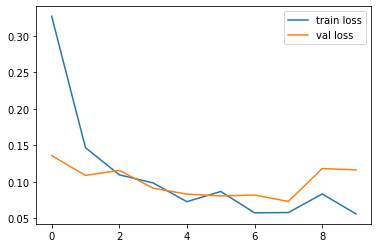

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

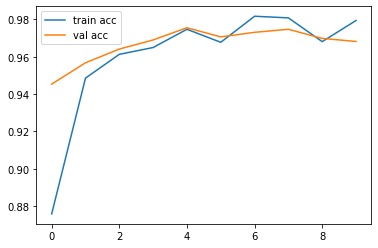

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model2 = tf.keras.models.load_model("/content/bestModel.h5")

In [ ]:
acc= model2.evaluate_generator(test_set)[1]

print(f"Model accuracy is {acc*100}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Model accuracy is 97.95918464660645


In [ ]:
from keras.preprocessing.image import load_img,img_to_array

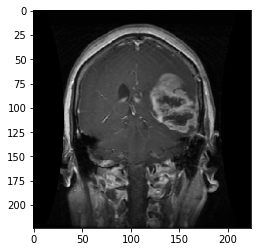

The image is having Brain Tumor


In [ ]:
path="/content/cc"
image = load_img(path,target_size=(224,224))
image_arr = img_to_array(image)/255
plt.imshow(image_arr)
plt.show()
image_arr= np.expand_dims(image_arr, axis=0)

predictions = (model2.predict(image_arr) > 0.6).astype("int32")[0][0]

if predictions==1:
  print("The image is having Brain Tumor")
else:
  print("The image is not having Brain Tumor")